In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [2]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

In [3]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Feature selection

Feature ranking:
1. feature Clean sheets (0.040)
2. feature Assists (0.040)
3. feature Passes (0.034)
4. feature Goals (0.031)
5. feature Big Chances Created (0.028)
6. feature Blocked shots (0.025)
7. feature Shots on target (0.024)
8. feature Goals with right foot (0.022)
9. feature Goals Conceded (0.021)
10. feature Big chances missed (0.021)
11. feature Shots (0.021)
12. feature Goals with left foot (0.020)
13. feature Tackle success % (0.020)
14. feature Headed goals (0.020)
15. feature Through balls (0.019)
16. feature Yellow cards (0.019)
17. feature Crosses (0.019)
18. feature Clearances off line (0.019)
19. feature Own goals (0.019)
20. feature Accurate long balls (0.019)
21. feature Penalties scored (0.019)
22. feature Shooting accuracy % (0.019)
23. feature Sweeper clearances (0.019)
24. feature Throw outs (0.018)
25. feature Hit woodwork (0.018)
26. feature Punches (0.018)
27. feature Offsides (0.018)
28. feature Cross accuracy % (0.018)
29. feature Catches (0.018)
30. feat

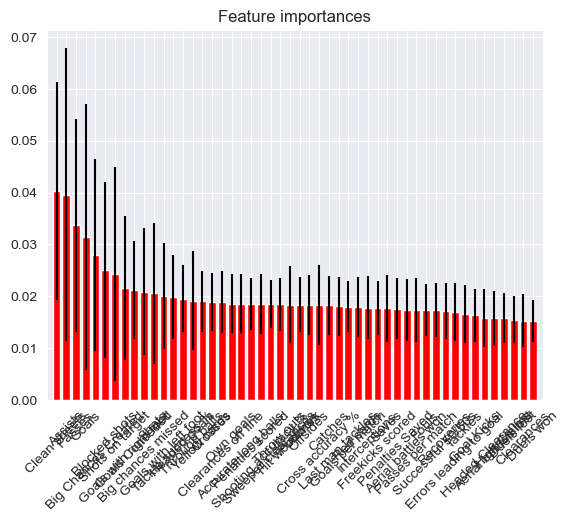

In [4]:
forest=RandomForestClassifier()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

In [5]:
X=X.drop(columns=X.columns[indices[15:]])

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2835, 15), (2835,), (354, 15), (354,), (355, 15), (355,))

## SGD

In [22]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier()

In [23]:
clf.score(X_test,y_test)

0.5310734463276836

In [24]:
clf.score(X_val,y_val)

0.5661971830985916